In [12]:
# Имопртируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv("Salary_Data.csv") #Читаем данные .csv файла

In [6]:
df.info() #выводим информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


У нас есть DataFrame с 6704 строками и 6 столбцами. В данных есть пропущенные значения. Столбцы включают информацию о возрасте, поле, уровне образования, должности, опыте работы и зарплате. Типы данных включают float64 для числовых значений и object для текстовой информации. Общий объем памяти, занимаемый DataFrame, составляет примерно 314.4 KB.


In [ ]:
df.head(5)  #первые 5 даннных

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


Описание трех полей их количество, среднее значение, Стандартное отклонение, минимальное значение, промежутки и максимальное значение

In [ ]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

Ищем количество пустых полей

In [7]:
df = df.dropna(how='any')

удаляем ненужные строки с пустыми полями

In [ ]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

убедимся что поля очищены

**Форматирование строк для единтичности будущих вычислении**


In [24]:
df["Education Level"] = df["Education Level"].str.lower()
df["Education Level"] = df["Education Level"].str.replace(" degree", "")
df["Job Title"] = df["Job Title"].str.lower()

Выводим гистограмму, показывающую распределение зарплат.

In [15]:
fig = px.histogram(df, x='Salary', nbins=20, opacity=0.7, color_discrete_sequence=['black'])
fig.update_layout(
    title='Distribution of Salaries',
    xaxis_title='Salary',
    yaxis_title='Frequency',
    bargap=0.05
)
fig.show()

1.Каково распределение зарплат в наборе данных и каковы основные сводные статистические данные?

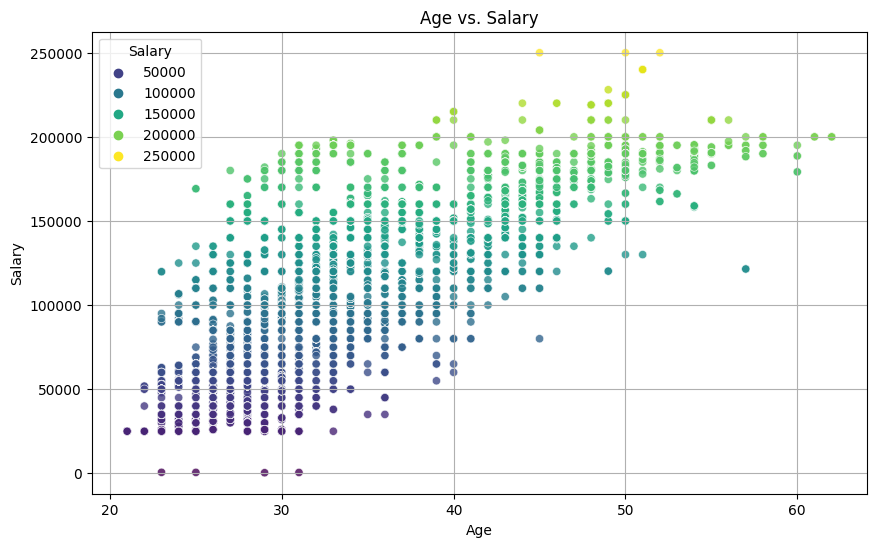

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=df, hue='Salary', palette='viridis', alpha=0.8)
plt.title('Age vs. Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

2.Как возраст коррелирует с зарплатой? Получают ли пожилые люди, как правило, большую компенсацию?

In [ ]:
df["Age"].corr(df["Salary"])

0.7280606296367428

3.Имеют ли люди с более многолетним опытом работы тенденцию получать более высокую заработную плату, и если да, то какова природа этой взаимосвязи?

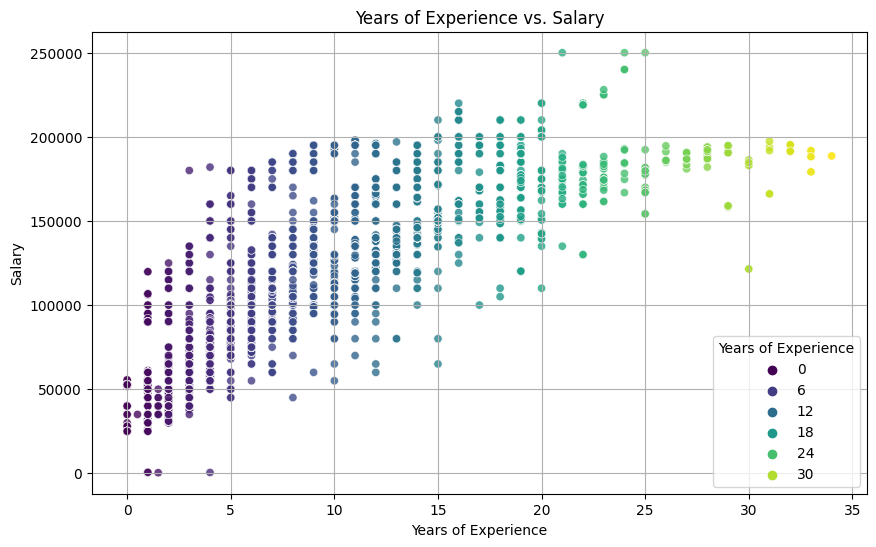

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of Experience', y='Salary', data=df, hue='Years of Experience', palette='viridis', alpha=0.8)
plt.title('Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


Предполагается, что с увеличением опыта работы растет заработная плата, что указывает на положительную линейную зависимость. Но иногда бывает так что наоборот, например в государственных работах зарпалат может быть фиксированной и не повышатся.

In [20]:
df["Years of Experience"].corr(df["Salary"])

0.8089681695139437

Если корриляция больше нуля, то люди с более многолетним опытом работы тенденцию получают чаще.

4.Оказывает ли уровень образования существенное влияние на заработную плату, и если да, то какие степени дают самую высокую компенсацию?

In [26]:
df['Education Level'] = df['Education Level'].str.lower()
education_salary = df.groupby("Education Level")["Salary"].mean().sort_values(ascending=False)
education_salary

Education Level
phd            165651.457999
master's       130112.056452
bachelor's      95082.908640
high school     36706.694196
Name: Salary, dtype: float64

In [27]:
fig = px.bar(x=education_salary.index, y=education_salary.values, color=education_salary.values,
             color_continuous_scale='viridis', labels={'x': 'Education Level', 'y': 'Average Salary'})
fig.update_layout(
    title='Average Salary by Education Level',
    xaxis_tickangle=-45,
    yaxis_title='Average Salary',
)
fig.show()

Можно убидиться что да. В странах запада твое образование имеет значение на твою зарплату. В среднем phd получают 160к долларов в год в отличии от выпускника бакалавра, который получает 90к в среднем в году.

5.Можем ли мы выявить какие-либо тенденции в заработной плате, основанные на различных названиях должностей? Какие роли, как правило, предлагают более высокую компенсацию?

In [28]:
average_salary_by_title = df.groupby('Job Title')['Salary'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(average_salary_by_title, x='Job Title', y='Salary', color='Salary',
             color_continuous_scale='blues', labels={'Job Title': 'Job Title', 'Salary': 'Average Salary'})
fig.update_layout(
    title='Average Salary by Job Title',
    xaxis_tickangle=-45,
    yaxis_title='Average Salary',
    width=800,
    height=400,
)
fig.show()

На гистограмме видно что у должностой повыше соответсвенно выше зарплата в среднем. Senior и Director зачастую занимают топовые позиции в зарплате.

Дополнение: В качестве примера можно сравнить полами

In [30]:
filtered_df = df[df['Gender'] != 'Other']
average_salaries = filtered_df.groupby('Gender')['Salary'].mean().reset_index()

fig = px.bar(average_salaries, x='Gender', y='Salary', color='Gender', color_discrete_sequence=['blue', 'pink'],
             labels={'Gender': 'Gender', 'Salary': 'Average Salary'})
fig.update_layout(
    title='Average Salary by Gender',
    xaxis_title='Gender',
    yaxis_title='Average Salary',
)
fig.show()


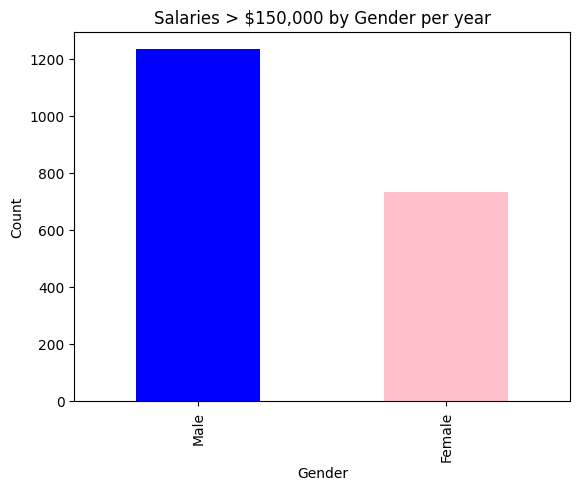

In [ ]:
df = df[df['Salary'] > 150000]

df = df[df['Gender'] != 'Other']
salary_counts = df['Gender'].value_counts()

salary_counts.plot(kind="bar", color=['blue', 'pink'])
plt.title('Salaries > $150,000 by Gender per year')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Как можно заметить. Зарплата свыше 150 000$ мужчин больше почти в два раза чем у женщин.